In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

In [3]:
from google.colab import files
uploaded= files.upload()

Saving co2-emissions-per-capita.csv to co2-emissions-per-capita.csv
Saving primary-energy-cons.csv to primary-energy-cons.csv


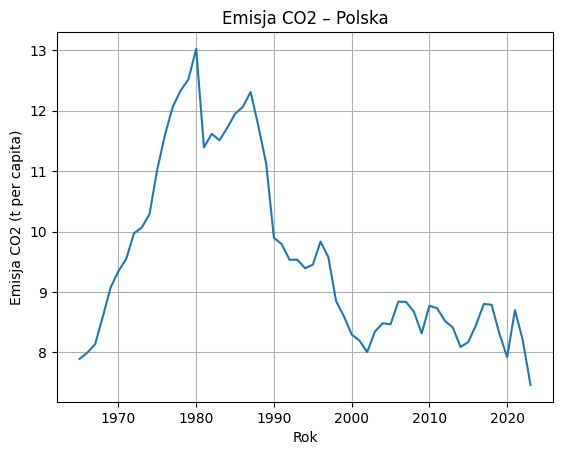

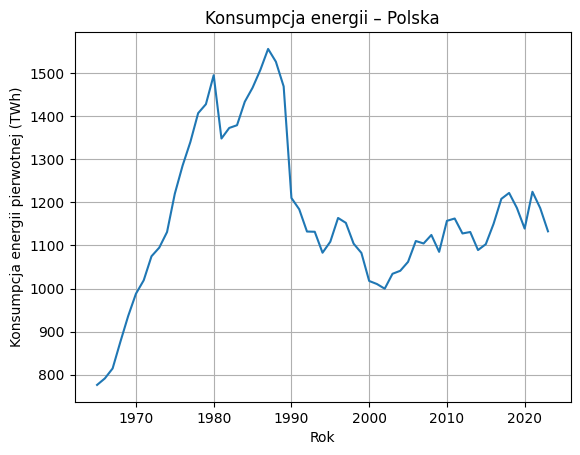

 CSV: polska_energia_co2.csv
 Excel: energia_co2_kraje.xlsx
 SQLite: energia_co2.db
 Pliki stworzone, możliwe do otworzenia w folderze content


In [6]:
co2 = pd.read_csv("co2-emissions-per-capita.csv")
energy = pd.read_csv("primary-energy-cons.csv")

co2 = co2.rename(columns={
    "Entity": "Country",
    "Annual CO₂ emissions (per capita)": "CO2"
})

energy = energy.rename(columns={
    "Entity": "Country",
    "Primary energy consumption (TWh)": "Energy"
})

co2 = co2[["Country", "Year", "CO2"]]
energy = energy[["Country", "Year", "Energy"]]

# POLSKA
poland = pd.merge(
    co2[co2["Country"] == "Poland"],
    energy[energy["Country"] == "Poland"],
    on=["Country", "Year"]
)

poland.to_csv("polska_energia_co2.csv", index=False)

# Inne kraje

kraje_excel = {
    "UE": "European Union (27)",
    "USA": "United States",
    "Chiny": "China",
    "Indie": "India"
}

with pd.ExcelWriter("energia_co2_kraje.xlsx", engine="openpyxl") as writer:
    for zakladka, kraj in kraje_excel.items():
        df_kraj = pd.merge(
            co2[co2["Country"] == kraj],
            energy[energy["Country"] == kraj],
            on=["Country", "Year"]
        )
        df_kraj.to_excel(writer, sheet_name=zakladka, index=False)

# SQLITE BAZA DANYCH
kraje_db = ["Poland", "Germany", "Spain"]

db_df = pd.merge(
    co2[co2["Country"].isin(kraje_db)],
    energy[energy["Country"].isin(kraje_db)],
    on=["Country", "Year"]
)

conn = sqlite3.connect("energia_co2.db")
db_df.to_sql("energia_co2", conn, if_exists="replace", index=False)
conn.close()

# WYKRESY – POLSKA
plt.figure()
plt.plot(poland["Year"], poland["CO2"])
plt.xlabel("Rok")
plt.ylabel("Emisja CO2 (t per capita)")
plt.title("Emisja CO2 – Polska")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(poland["Year"], poland["Energy"])
plt.xlabel("Rok")
plt.ylabel("Konsumpcja energii pierwotnej (TWh)")
plt.title("Konsumpcja energii – Polska")
plt.grid(True)
plt.show()

print(" CSV: polska_energia_co2.csv")
print(" Excel: energia_co2_kraje.xlsx")
print(" SQLite: energia_co2.db")
print(" Pliki stworzone, możliwe do otworzenia w folderze content")
